In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebraxxs
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
import matplotlib.pyplot as plt 


In [4]:
import tensorflow as tf

In [5]:
# Transform labels
number_of_classes = 47

In [6]:
map_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [7]:
import cv2

In [18]:
img = cv2.imread("mnist_images/contour_0.png", cv2.IMREAD_GRAYSCALE)

In [19]:
img.shape

(28, 28)

(28, 28)

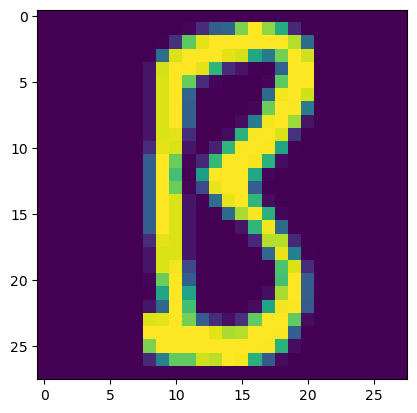

In [20]:
plt.imshow(img)
img.shape

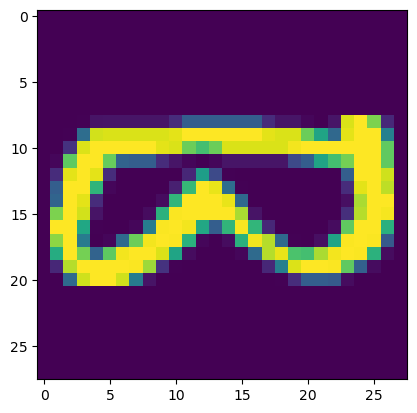

In [21]:
img = np.rot90(img,1,(0,1))
img = np.flip(img, axis=0)
plt.imshow(img)

In [22]:
img = img / 255.

In [23]:
model = tf.keras.Sequential([
    tf.keras.Input((28, 28, 1)),
    tf.keras.layers.Conv2D(32,3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [24]:
model.load_weights("Best_points.h5")

In [25]:
img = img.reshape(1, 28, 28, 1)
prediction = map_dict[np.argmax(model(img))]
print(prediction)
model(img)[0]*100

B


<tf.Tensor: shape=(47,), dtype=float32, numpy=
array([4.61933653e-17, 1.44003482e-23, 4.61039821e-15, 8.06246570e-10,
       2.64436265e-20, 1.03746079e-13, 3.39198773e-11, 3.14884789e-27,
       2.30063940e-03, 2.16806421e-17, 7.90524127e-14, 9.99975815e+01,
       1.13714108e-10, 1.22694861e-15, 3.04872488e-10, 2.88932944e-09,
       3.15344806e-07, 7.34768458e-17, 8.13794375e-20, 2.88453893e-24,
       2.90123836e-07, 9.37405738e-17, 4.94195785e-21, 1.54210700e-21,
       2.33097532e-18, 3.14209920e-08, 6.32640014e-16, 1.13828617e-04,
       1.70251009e-12, 1.21782131e-18, 3.60686416e-22, 1.23691005e-17,
       1.79365322e-27, 4.12554149e-12, 1.13172199e-12, 6.31850171e-12,
       4.11099562e-19, 9.89723165e-11, 6.08314503e-20, 8.71821157e-08,
       7.99475508e-09, 6.45765468e-08, 3.96025861e-16, 7.52436781e-25,
       1.32556625e-06, 2.23387914e-14, 2.17675847e-16], dtype=float32)>

In [43]:
i = 17
test = test_images[i].reshape([1, 28, 28, 1])
test_view = test.reshape([28,28])
test_view = np.flip(test_view, axis=0)
test_view = np.rot90(test_view,3,(0,1))
plt.imshow(test_view)

inv_map_dict = {v : k for k, v in map_dict.items()}

prediction = map_dict[np.argmax(model(test))]
actual = map_dict[np.argmax(y2[i])]
pred_prob = tf.keras.backend.get_value(model(test)[0][inv_map_dict[prediction]])
actual_prob = tf.keras.backend.get_value(model(test)[0][inv_map_dict[actual]])

print(f"prediction: {prediction}, probability {pred_prob}")
print(f"prediction: {actual}, probability {actual_prob}")

NameError: name 'test_images' is not defined